In [1]:
from qiskit import QuantumCircuit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram

In [2]:
qc = QuantumCircuit(2,2)

#Create entanglement 
qc.h(0)
qc.cx(0, 1)
qc.barrier()

In [3]:
def encode(circuit, qubit, message):
    if message == '00':
        circuit.i(qubit)
    elif message == '10':
        circuit.x(qubit)
    elif message == '01':
        circuit.z(qubit)
    elif message == '11':
        circuit.z(qubit)
        circuit.x(qubit)
    else:
        print("invalid")

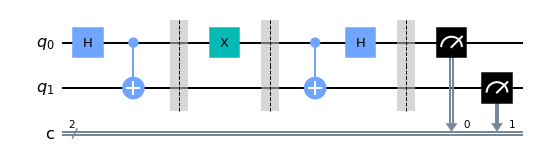

In [4]:
#encoding message from sender
msg = '10'
encode(qc, 0, msg)
qc.barrier()

#decoding the message by reciever
qc.cx(0, 1)
qc.h(0)
qc.barrier()

#measure
qc.measure(range(2), range(2))

qc.draw('mpl')


{'10': 1024}


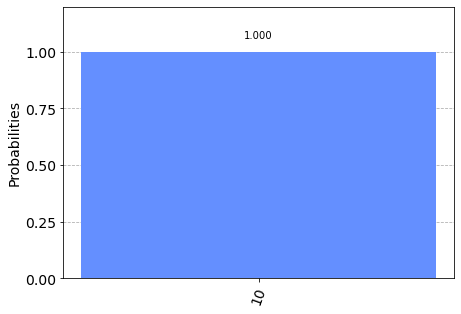

In [5]:
qasm_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(qc)
result = qasm_sim.run(qobj).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

In [6]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and
                                   x.configuration().n_qubits >= 2 and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_belem


In [7]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_circuit = transpile(qc, backend)
qobj = assemble(transpiled_circuit, shots=shots)
job = backend.run(qobj)

job_monitor(job, interval=2)

<ipython-input-7-5f5549b62ed0>:7: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(qobj)


Job Status: job has successfully run


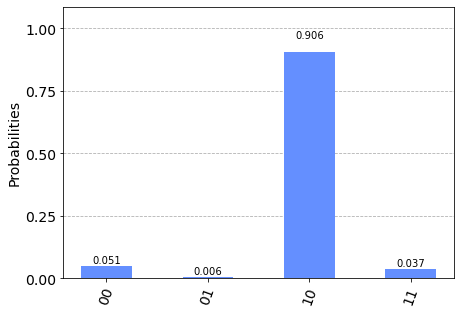

In [8]:
results = job.result()
answer = results.get_counts()

plot_histogram(answer)